In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("plik8.csv")
data = data.drop(columns='Unnamed: 0')
print(data)
print(np.unique(data['linia']))

        rok    strata        linia
0      1989  20592.10   Buss_Distr
1      1989   2069.71   Buss_Distr
2      1989   1756.93   Buss_Distr
3      1989  21100.68   Buss_Distr
4      1989  58980.88   Buss_Distr
...     ...       ...          ...
10586  2023   7258.05  Internal_Fr
10587  2023   2292.21  Internal_Fr
10588  2023   1026.96  Internal_Fr
10589  2023   3663.21  Internal_Fr
10590  2023   2879.02  Internal_Fr

[10591 rows x 3 columns]
['Buss_Distr' 'Com_Ban' 'Damage' 'Empl_Pract' 'Execut_Del' 'External_Fr'
 'Internal_Fr']


In [32]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = data['rok'].value_counts()
    


rok
1991    346
2013    330
1994    328
2011    326
2008    319
2009    317
1996    317
2005    316
2010    315
1990    315
1989    312
2019    309
1992    305
1997    304
2007    302
2012    301
2014    301
2006    301
2000    301
2003    301
1993    300
2001    297
2004    296
2002    294
1998    293
2020    291
2018    290
1999    288
1995    288
2021    287
2017    286
2023    284
2015    283
2016    278
2022    270
Name: count, dtype: int64
rok
1991    346
2013    330
1994    328
2011    326
2008    319
2009    317
1996    317
2005    316
2010    315
1990    315
1989    312
2019    309
1992    305
1997    304
2007    302
2012    301
2014    301
2006    301
2000    301
2003    301
1993    300
2001    297
2004    296
2002    294
1998    293
2020    291
2018    290
1999    288
1995    288
2021    287
2017    286
2023    284
2015    283
2016    278
2022    270
Name: count, dtype: int64
rok
1991    346
2013    330
1994    328
2011    326
2008    319
2009    317
1996    317
2005    316


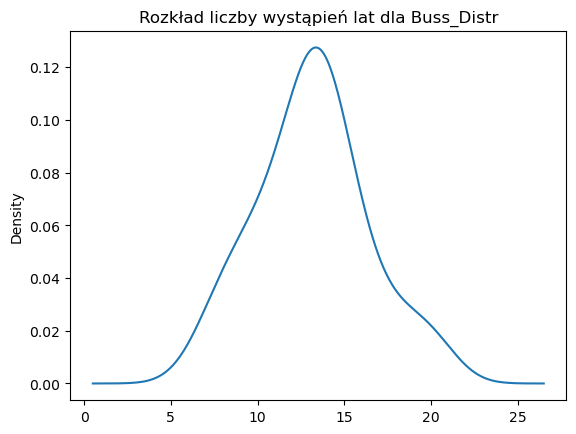

≈örednia dla Buss_Distr: 13.14
Wariancja dla Buss_Distr: 10.01
Odchylenie standardowe dla Buss_Distr: 3.16


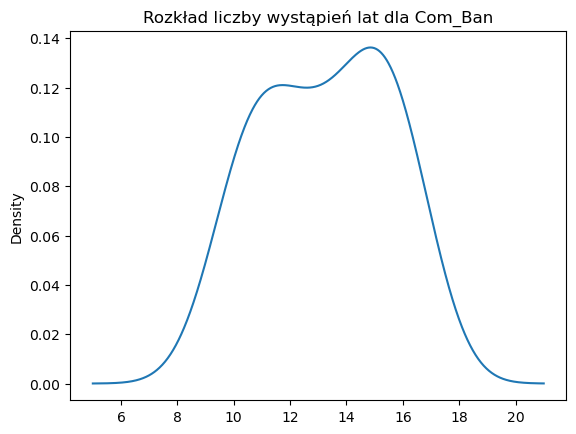

≈örednia dla Com_Ban: 13.26
Wariancja dla Com_Ban: 5.26
Odchylenie standardowe dla Com_Ban: 2.29


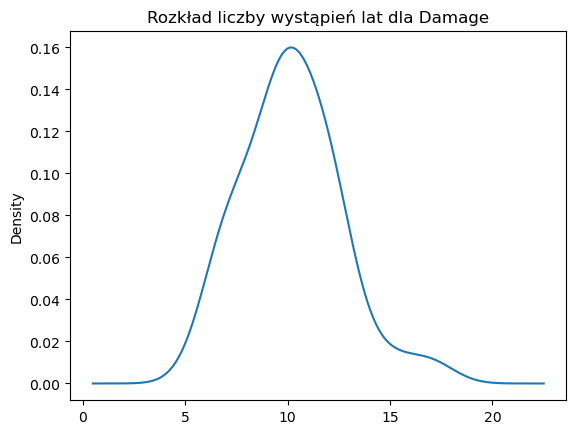

≈örednia dla Damage: 10.17
Wariancja dla Damage: 5.68
Odchylenie standardowe dla Damage: 2.38


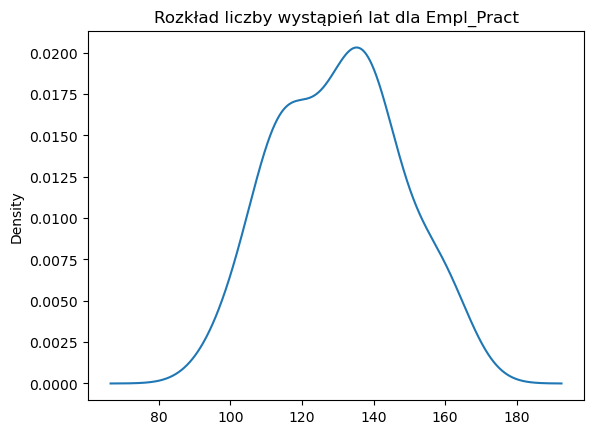

≈örednia dla Empl_Pract: 130.29
Wariancja dla Empl_Pract: 283.03
Odchylenie standardowe dla Empl_Pract: 16.82


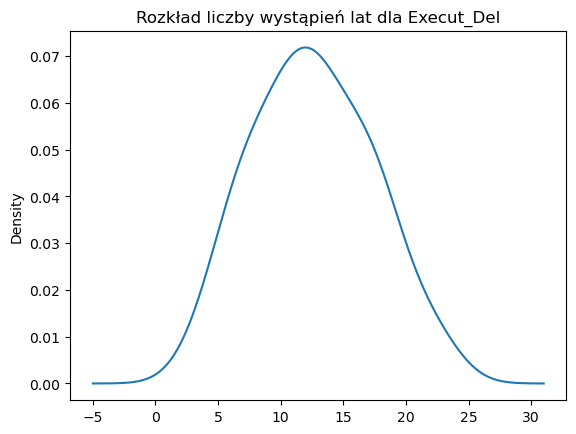

≈örednia dla Execut_Del: 12.57
Wariancja dla Execut_Del: 22.02
Odchylenie standardowe dla Execut_Del: 4.69


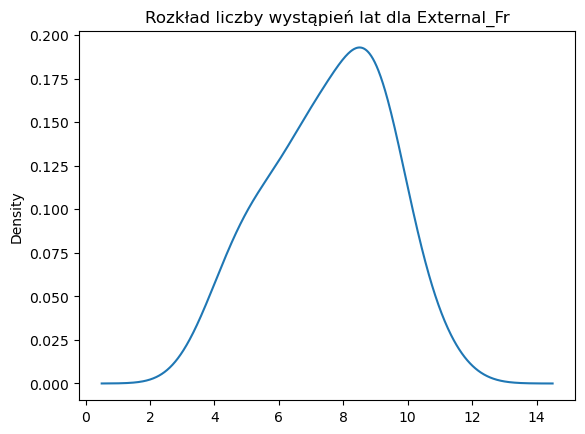

≈örednia dla External_Fr: 7.54
Wariancja dla External_Fr: 3.31
Odchylenie standardowe dla External_Fr: 1.82


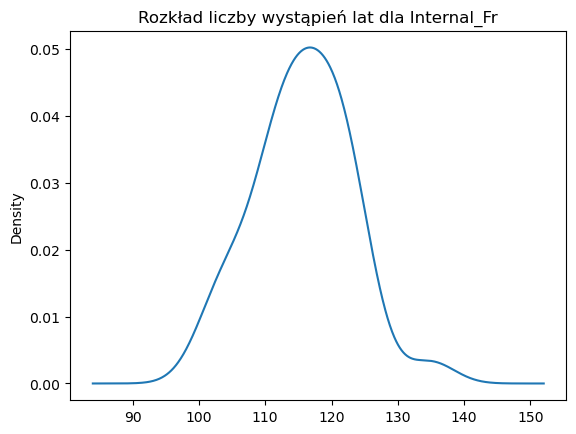

≈örednia dla Internal_Fr: 115.63
Wariancja dla Internal_Fr: 52.59
Odchylenie standardowe dla Internal_Fr: 7.25


In [43]:
from scipy.stats import poisson
from scipy.stats import chisquare
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()
    year_counts.plot(kind='kde', title=f'Rozk≈Çad liczby wystƒÖpie≈Ñ lat dla {linia}', xlabel='Liczba', ylabel='Frequency')
    plt.show()
    print("≈örednia dla {}: {:.2f}".format(linia,year_counts.mean()))
    print("Wariancja dla {}: {:.2f}".format(linia,year_counts.std()**2))
    print("Odchylenie standardowe dla {}: {:.2f}".format(linia,year_counts.std()))
    

In [44]:
from scipy.stats import chisquare

for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()
    
    # Calculate the expected Poisson distribution
    poisson_mean = year_counts.mean()
    poisson_pmf = poisson.pmf(year_counts.index, poisson_mean)
    
    # Perform the chi-square test
    chi2, p_value = chisquare(year_counts, f_exp=poisson_pmf)
    
    print(f"Chi-square test for {linia}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
inf

dla czƒôsto≈õci - rozk≈Çady Poissona, dwumianowy i ujemny dwumianowy
por√≥wnanie ≈õredniej i wariancji z pr√≥by.
- ùê∏ùëã > ùê∑2ùëã rozk≈Çad dwumianowy
- ùê∏ùëã = ùê∑2ùëã rozk≈Çad Poissona
- ùê∏ùëã < ùê∑2ùëã rozk≈Çad ujemny dwumianowy

Je≈õli klasyczne metody zawodzƒÖ, to zawsze mo≈ºemy szukaƒá
innych rozk≈Çad√≥w teoretycznych.
Np.
¬ª rozk≈Çad geometryczny
¬ª rozk≈Çad Pascala
¬ª rozk≈Çad hipergeometryczny

W praktyce banki u≈ºywajƒÖ r√≥≈ºnych rozk≈Çad√≥w, kt√≥re majƒÖ
modelowaƒá dotkliwo≈õƒá strat. Mo≈ºna spotkaƒá siƒô z:
‚Ä¢ rozk≈Çadem logarytmiczno-normalnym,
‚Ä¢ rozk≈Çadem wyk≈Çadniczym,
‚Ä¢ rozk≈Çadem Weibulla,
‚Ä¢ rozk≈Çadem Pareto,
‚Ä¢ rozk≈Çadem warto≈õci ekstremalnych itp.

SƒÖ trzy g≈Ç√≥wne testy dopasowania danych empirycznych
do rozk≈Çad√≥w teoretycznych:
- test chi-kwadrat Pearsona,
- test Ko≈Çmogorowa-Smirnowa (Lilieforsa),
- test Andersona-Darlinga.
¬ª W ka≈ºdym przypadku hipotezy majƒÖ postaƒá: H0: dane mogƒÖ
byƒá opisane rozk≈Çadem ‚Ä¶ przy H1: dane nie mogƒÖ byƒá ‚Ä¶

dla ka≈ºdej linii: 
ile jest wydarze≈Ñ dla ka≈ºdego roku - na tej podstawie wyznaczyƒá rozk≈Çad czƒôsto≈õci, na jego podstawie przypisaƒá rozk≈Çad teoretyczny (wydarzenia/rok) i z niego wylosowaƒá scenariusz liczby zdarze≈Ñ
jaka jest dotkliwo≈õƒá og√≥≈Çem (?), wyznaczyƒá rozk≈Çad, na jego podstawie przypisaƒá rozk≈Çad teoretyczny itd. analogicznie jak wy≈ºej